In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import Button, HBox, VBox
import numpy as np
import json

In [47]:
outid = '1713738650'
seed = 1
with open(f'../outputs/{outid}/posterior_vals_seed{9999+seed}.json', 'r') as fh:
    data = json.load(fh)

In [48]:
def posterior_at_t(data, t, animate=False, interval=100, repeat=False, no_target=False):
    plt.clf()
    fig, ax = plt.subplots()
    
    vals = data[f'{t if not animate else 0}']
    vals = np.array(vals)[(1 if no_target else 0):, :]
    y = vals[:, 0]
    mean = vals[:, 1]
    std = vals[:, 2]
    # y, mean, std = list(zip(*vals))
    # y, mean, std = map(np.array, [y, mean, std])
    x = 1 + np.arange(len(y))
    ax.plot(x, y, label="True")
    ax.plot(x, mean, label="Posterior", color="orange")
    ax.fill_between(x, mean-std, mean+std, alpha=0.2, color="orange")
    ax.legend()
    ax.set_title(f"t = {t if not animate else 0}")
    ax.set_ylabel("Similarity")
    ax.set_xlabel("True Rank")
    
    def update(frame):
        ax.clear()
        vals = data[f'{frame}']
        vals = np.array(vals)[(1 if no_target else 0):, :]
        y = vals[:, 0]
        mean = vals[:, 1]
        std = vals[:, 2]
        # y, mean, std = list(zip(*vals))
        # y, mean, std = map(np.array, [y, mean, std])
        x = 1 + np.arange(len(y))
        ax.plot(x, y, label="True")
        ax.plot(x, mean, label="Posterior", color="orange")
        ax.fill_between(x, mean-std, mean+std, alpha=0.2, color="orange")
        ax.legend()
        ax.set_title(f"t = {frame}")
        ax.set_ylabel("Similarity")
        ax.set_xlabel("True Rank")
    
    if animate:
        ani = animation.FuncAnimation(fig=fig, func=update, frames=range(t), interval=interval, repeat=repeat, repeat_delay=0)
        # plt.show()
        return plt, ani
    plt.show()

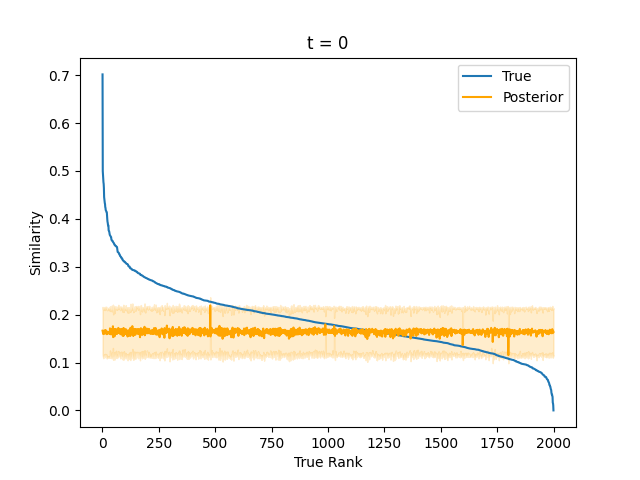

In [49]:
plt, ani = posterior_at_t(data, 99, animate=True, interval=100, repeat=True, no_target=True)

In [51]:
ani.pause()

In [ ]:
ani.save("test.gif", writer="imagemagick")

In [150]:
# Debugging laplace BNNs

from sklearn.linear_model import LinearRegression
vals = data['99']
y, mean, std = list(zip(*vals))
y, mean, std = map(np.array, [y, mean, std])
x = 1 + np.arange(len(y))
reg = LinearRegression()
reg.fit(x.reshape(-1, 1), mean)
print("slope:", reg.coef_)
print("r-squared", reg.score(x.reshape(-1,1), mean))
plt.clf()
plt.plot(x, reg.predict(mean.reshape(-1,1)))
plt.ylabel("Predicted Mean")
plt.xlabel("Rank")
plt.show()

array([-4.39011884e-08])